In [1]:
import tifffile as tif
from glob import glob
from collections import OrderedDict
import nrrd
import os
import matplotlib.pyplot as plt
import cv2
import re
import numpy as np
from octvision3d.utils import get_filenames, natural_sort, overlay_segments, sorted_rgb_colors

DEBUG = False

In [2]:
dir_path = "/data/dkermany_data/OCT/RAW/OCT-Training-Set-v6"

In [3]:
vol_paths = [f for f in get_filenames(dir_path, "tif") if "slo" not in f]
seg_paths = [f for f in get_filenames(dir_path, "seg.nrrd")]
assert len(vol_paths) == len(seg_paths)
if DEBUG: print(vol_paths)

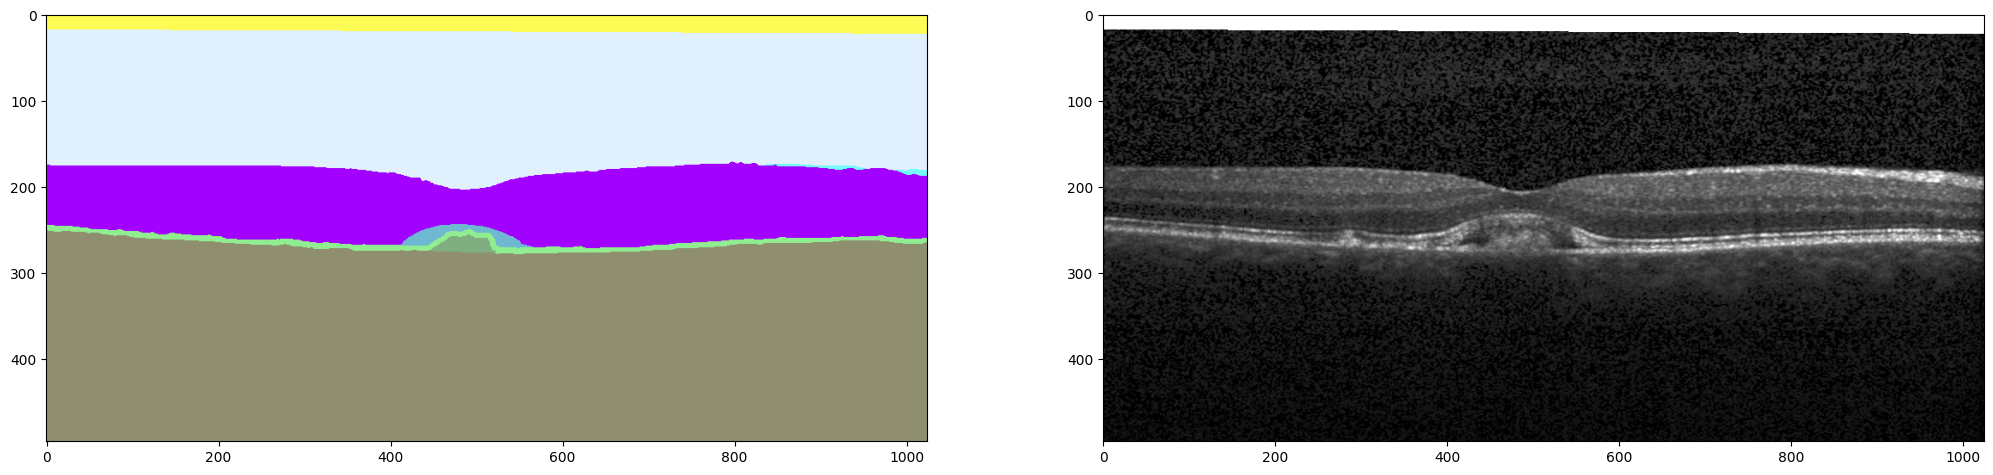

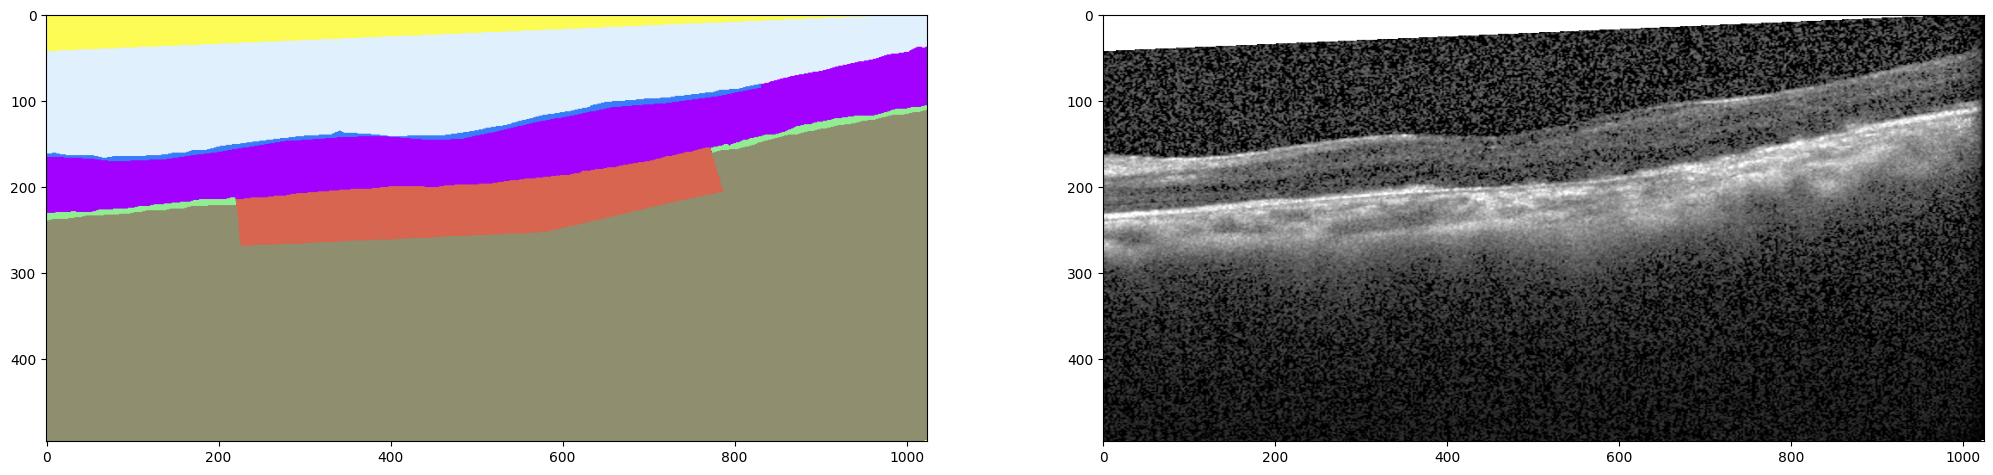

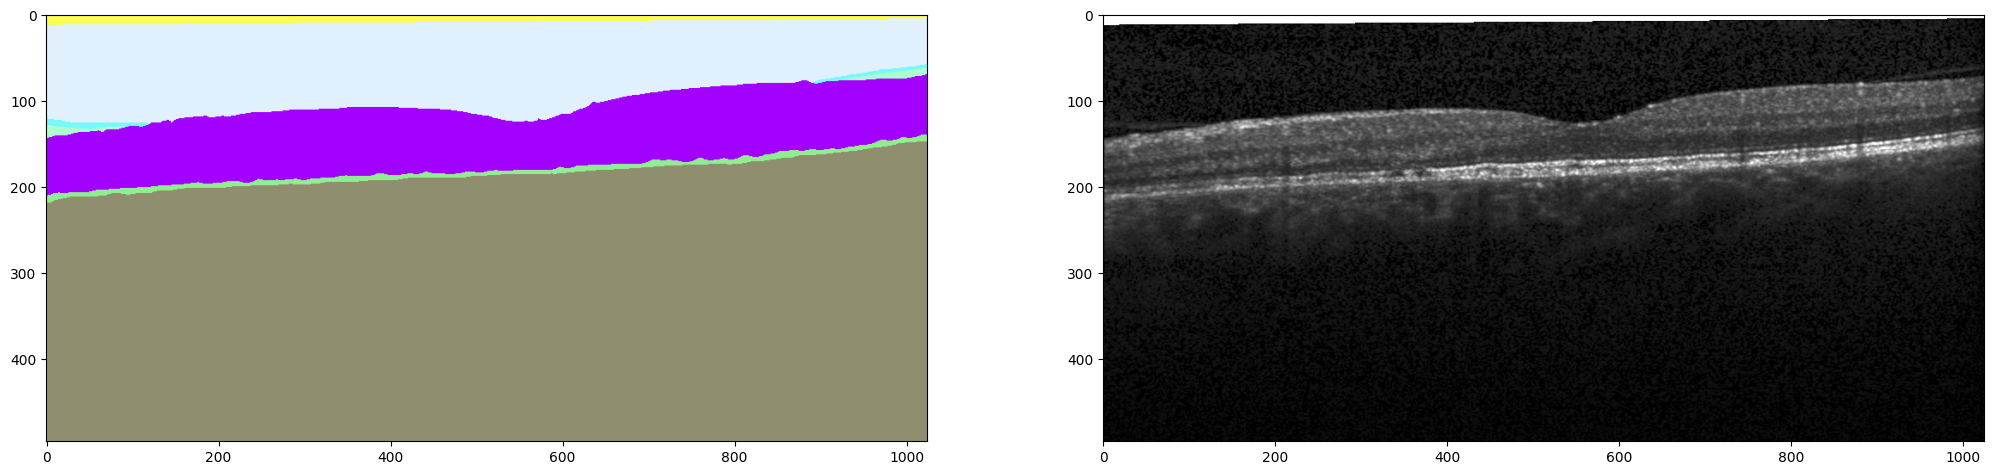

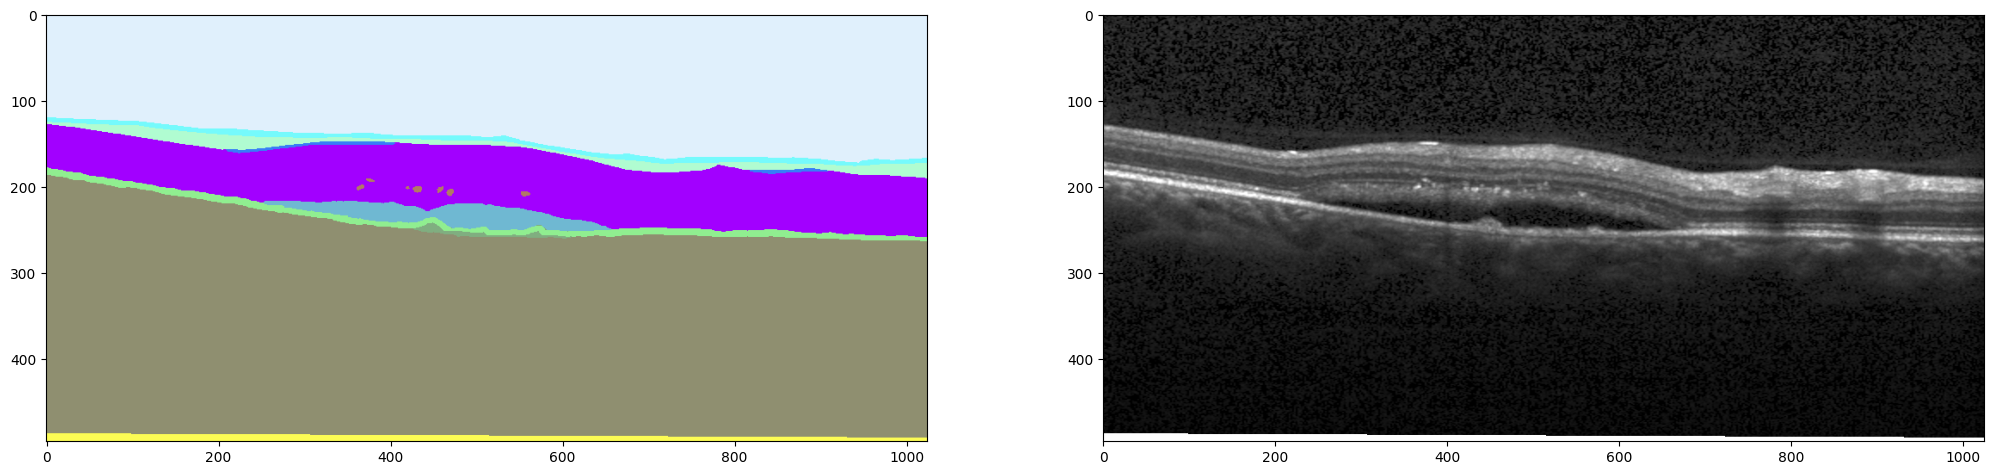

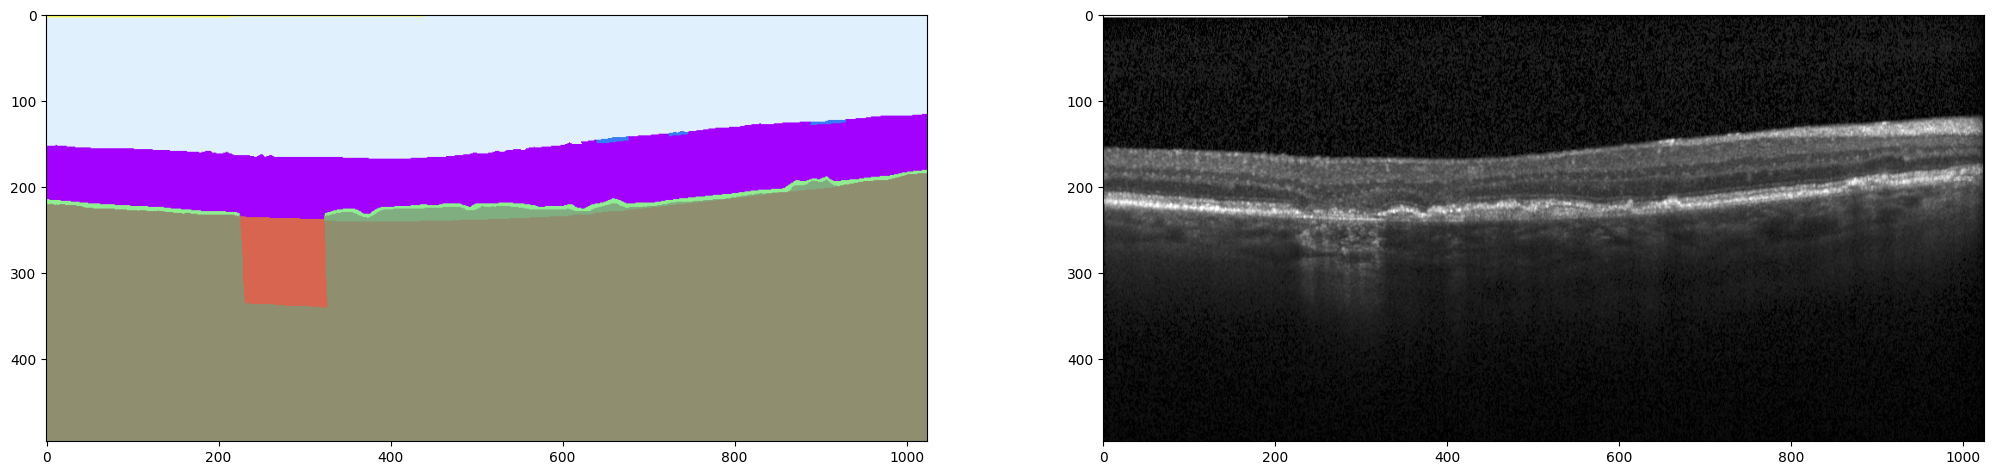

In [4]:
pattern = re.compile("^Segment\d+")
from random import shuffle

for i, (vol_path, seg_path) in enumerate(zip(vol_paths, seg_paths)):
    vol = tif.imread(vol_path)
    bitmap, header = nrrd.read(seg_path)

    segment_names = {k.split("_")[0]: v for k, v in header.items() if k.endswith("Name")}
    sorted_name_map = natural_sort(segment_names.items())
    _, sorted_names = list(zip(*sorted_name_map))

    rgb_colors = sorted_rgb_colors(header)

    if DEBUG:
        print(f"Name: {os.path.splitext(os.path.basename(vol_path))[0]}")

    overlay = overlay_segments(bitmap, rgb_colors)

    f, ax = plt.subplots(1,2, figsize=(25,14))
    ax[0].imshow(overlay[9])
    ax[1].imshow(vol[9], cmap="gray")
    if i >= 4:
        break
    
 